# Linear Regression

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from sklearn.datasets import make_regression

In [8]:
X, y = make_regression(n_samples=500, n_features=1, noise=2.91)

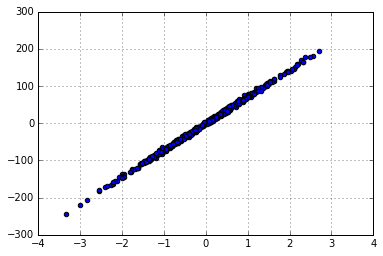

In [10]:
plt.figure(0)
plt.grid('on')
plt.scatter(X[:, 0], y[:])

In [26]:
Y = X**3 + X**2 + X

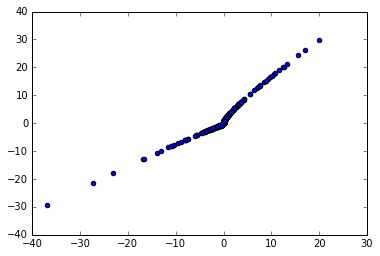

In [27]:
plt.scatter(X**3, Y)

In [270]:
X, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
print X.shape, y.shape, cof

(500, 1) (500,) 25.3108745463


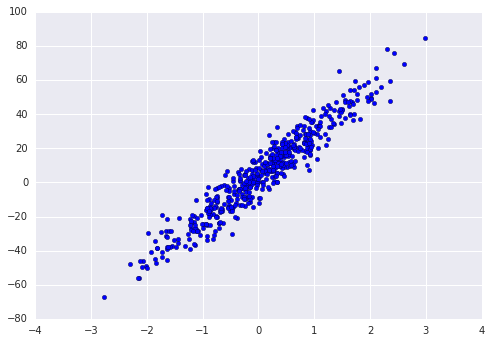

In [271]:
plt.figure(0)
plt.grid('on')
plt.scatter(X[:, 0], y[:])

In [272]:
split = int(0.8*X.shape[0])
split

400

In [273]:
# hypothesis function
def hypothesis(x, w):
    return x*w[1] + w[0]

# error compute
def get_error(y_true, x, w):
    err = 0.0
    
    # Get number of examples
    m = x.shape[0]
    for ix in range(m):
        # for each example compute the square error
        err += (y_true[ix] - hypothesis(x[ix], w))**2
    # Get mean sq. error
    err = err / (2*m)
    return err

# error gradient
def get_grads(y_true, x, w):
    grad_00 = 0.0
    grad_01 = 0.0
    
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_00 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_01 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
    
    # Get mean grads
    grad_00 = grad_00 / m
    grad_01 = grad_01 / m
    return [grad_00, grad_01]

# update weights using grad. desc.
def grad_descent(x, y_true, w, learning_rate=0.1):
    error = get_error(y_true, x, w)
    [grad_00, grad_01] = get_grads(y_true, x, w)
    
    w[0] = w[0] - learning_rate*grad_00
    w[1] = w[1] - learning_rate*grad_01
    
    return error, w

In [274]:
W = np.array([0.1, 0.1])
loss = []

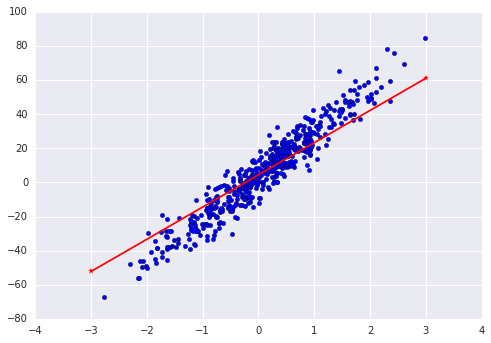

In [318]:
sns.plt.scatter(X[:, 0], y)

y_0 = hypothesis(-3, W)
y_1 = hypothesis(3, W)

plt.plot([-3, 3], [y_0, y_1], 'r*-')
plt.show()

l, W = grad_descent(X_train, y_train, W, learning_rate=0.1)


loss.append(l)


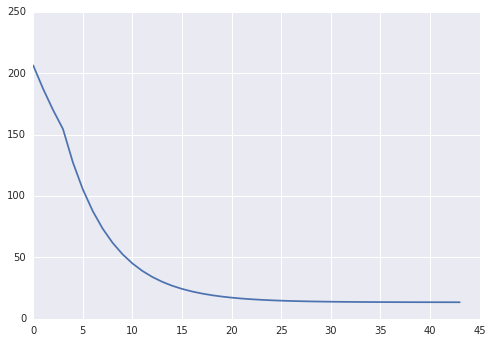

In [319]:
plt.plot(loss)
plt.show()

In [321]:
print W

[  4.41741327  18.91201636]


In [322]:
from sklearn.linear_model import LinearRegression

In [323]:
lr = LinearRegression()

In [324]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [325]:
lr.score(X_test, y_test)

0.93337251785733133